# DFS Maze Tutorial #

### Documentation ###
- ???? - [Link](???);

### What is ```Mesa```? ###
```Mesa``` is a modular framework for building, analyzing and visualizing agent-based models.



### Importing Dependencies ###

In [2]:
import yaml
import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

### User-Defined Classes ###

In [3]:
class Cell(object): # A 'Cell' is a point in the grid, surrounded by 4 walls
    def __init__(self, _x, _y, _value):
        self.x = _x # Coordinates
        self.y = _y
        self.value = _value
        self.visited = False #### MANTER?
    
    # Coordinates Methods
    def get_coords(self):
        return (self.x, self.y)

In [4]:
class Maze(object): 
    def __init__(self, size):
        # Grid
        self.size = size
        self.length = 2*size + 1 
        self.grid = self.build_grid() # Coords Format: 2*x + 1 / 2*y + 1
        # Entrance/Exit
        self.start = self.set_entrance() # [Cell]
        self.end = self.set_exit() # [Cell]
        # Cells
        self.stack = [] # LIFO [lst:Cell]

    # Grid Methods
    def build_grid(self): 
        # Create grid filled with walls (1)
        grid = [[Cell(x, y, 1) for y in range(self.length)] for x in range(self.length)] # Format: [[x1y1, x1y2,...],
                                                                                         #          [x2y1, x2y2,...],...]
        return grid
    
    # Entrance/Exit Methods
    def set_entrance(self): 
        return self.grid[1][0] # Entrance at NW corner

    def set_exit(self): 
        return self.grid[-2][-1] # Exit at SE corner
    
    # Maze Methods
    def build_maze(self):
        # Setting at the origin
        x, y = (0,0)
        # Opening the default path at (1,1)
        self.grid[2*x + 1][2*y + 1].value = 0
        # Initializing the stack 
        start_cell = self.grid[x][y]
        self.stack.append(start_cell)
        # Looping while stack is not empty...
        while self.stack:
            # Assign current cell's coordinates
            x, y = self.stack[-1].get_coords()
            # Assessing candidate neighbors
            offset = [(1, 0), (-1,0), (0, 1), (0, -1)] # Move Right, Move Left, Move Up, Move Down
            # Randomizing 'offset' in-place
            random.shuffle(offset) 
            # Looping 'offset'....
            for dx, dy in offset:
                # Updating neighbor coordinates
                nx, ny = x + dx, y + dy
                # If candidate neighbor is valid...
                if 0 <= nx < self.size and 0 <= ny < self.size and self.grid[2*nx + 1][2*ny + 1].value == 1:
                    # Opening the path (0)
                    self.grid[2*nx + 1][2*ny + 1].value = 0
                    self.grid[2*x + 1 + dx][2*y + 1 + dy].value = 0
                    # Adding to stack
                    self.stack.append(self.grid[nx][ny])
                    break # Break loop (a neighbor has been chosen)
            else: # Executed when loop finishes (all neighbors tried)
                self.stack.pop() # Removes last Cell (no pathable neighbors)
        # Adding entrance/exit
        self.start.value = 0
        self.end.value = 0

    # Utils Methods
    def get_grid_values(self): # OK
        grid_values = []
        # Looping 'self.grid'...
        for x_idx, x_row in enumerate(self.grid): # 0-indexed
            grid_values.append([cell.value for cell in x_row])
        return grid_values

    # Plot Methods
    def plot_maze(self): 
        # Preparing the data
        x = list(range(len(self.grid)))
        y = list(range(len(self.grid)))
        z = self.get_grid_values()
        ## Plot
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=120)
        # ColorMesh
        ax.pcolormesh(x, y, z, vmin=np.min(z), vmax=np.max(z), shading="auto", cmap="binary")
        # Entrance/Exit
        ax.scatter(self.start.y, self.start.x, s=14, marker="*", color="green") # Inverting coords since axis are inverted
        ax.scatter(self.end.y, self.end.x, s=14, marker="*", color="red")
        # Aspect
        ax.set_box_aspect(1)
        # Axis Labels
        ax.set_xlabel("y", fontsize=10)
        ax.set_ylabel("x", fontsize=10)
        # Axis Color
        ax.spines["left"].set_color(None)
        ax.spines["right"].set_color(None)
        # Ticks
        ax.tick_params(axis= "both", which= "both", color= "gray", labelsize= 4) 
        ax.set_xticks(x, labels= x) 
        ax.set_yticks(y, labels= y)
        ax.set_xticklabels(x, ha= "center", va= "center") 
        ax.set_yticklabels(y, ha= "right", va= "center") 
        # Title
        ax.set_title("DFS Maze Generation", loc="center", fontsize=10, fontname="Helvetica", pad=10)
        # Grid
        ax.grid(which= "both", color= "gray", alpha=0.25)

### Main ###

In [5]:
# Reading the YAML config
with open("./mazes.yaml", "r") as _stream:
    yaml_config = yaml.safe_load(_stream)

In [6]:
# Instantiating the 'Maze(object): 
maze = Maze(20)

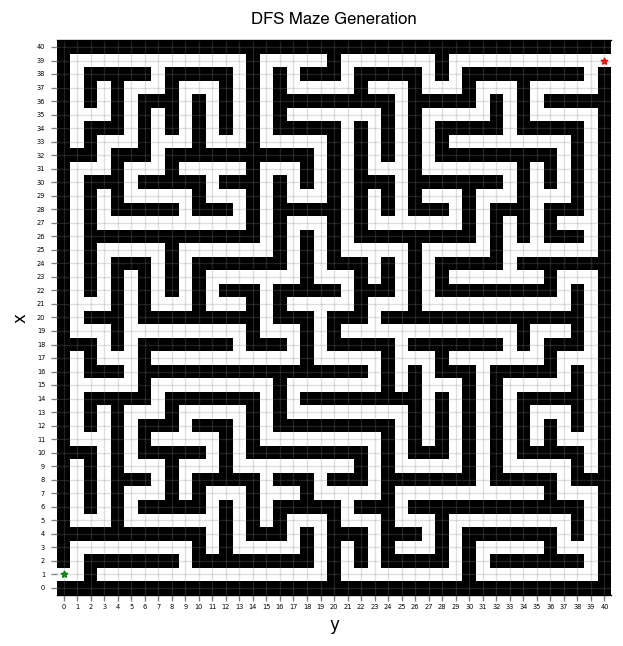

In [7]:
# Building the maze
maze.build_maze() 
# Plotting the maze
maze.plot_maze() 

---